# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets

my_btc = 1.2

my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Fetch current BTC price ()
response = requests.get("https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD")

btc_response_json = response.json()
btc_response_json
btc_response_json['data']['1']['quotes']['USD']['price']
btc_price = btc_response_json['data']['1']['quotes']['USD']['price']


# Compute current value of my crpto


# Print current crypto wallet balance
#print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
#print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

In [7]:

# Fetch current ETH price
eth_response = requests.get("https://api.alternative.me/v2/ticker/Ethereum/?convert=USD")
eth_response_json = eth_response.json()
eth_response_json['data']['1027']['quotes']['USD']['price']
eth_price = eth_response_json['data']['1027']['quotes']['USD']['price']




Fetch current BTC price

In [8]:
btc_price 

34725.0

Fetch current ETH price

In [122]:
eth_price 

2965.82

Compute current value of my crpto

In [123]:
# Compute current value of my crpto
btc_price * my_btc 

47764.799999999996

In [124]:
eth_price * my_eth 

15718.846

In [125]:
#print(f"The current value of your {my_btc} BTC is ${btc_price}")

In [126]:
#print(f"The current value of your {my_eth} ETH is ${eth_price:0.2f}")

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [127]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [128]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
# This is the SDK
api_key = os.getenv("ALPACA_API_KEY")
api_s_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
api_key,
api_s_key,
api_version = "v2"
)

In [129]:
#Format current date as ISO format
#from datetime import datetime
#today = pd.datetime.now().isoformat()
today = pd.Timestamp("2022-04-22", tz="America/New_York").isoformat()


In [130]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
       tickers,
       timeframe,
       start = today,
       end = today             
).df

# Reorganize the DataFrame

df_portfolio.index = df_portfolio.index.date

#Example code api.get_bars("AGG", timeframe, "2021-06-08", "2021-06-08", adjustment='raw').df
df_portfolio


,open,high,low,close,volume,trade_count,vwap,symbol
2022-04-22,102.73,103.1800,102.67,102.94,9152665,31498,102.925863,AGG
2022-04-22,436.94,438.0825,425.44,426.04,132156403,972064,429.813156,SPY


In [131]:


# Separate ticker data

AGG = df_portfolio [df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio [df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)






In [132]:
AGG

,open,high,low,close,volume,trade_count,vwap
2022-04-22,102.73,103.18,102.67,102.94,9152665,31498,102.925863


In [133]:
SPY

,open,high,low,close,volume,trade_count,vwap
2022-04-22,436.94,438.0825,425.44,426.04,132156403,972064,429.813156


In [134]:
# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY], axis=1, keys=['AGG','SPY'])
# Preview DataFrame
df_portfolio

AGG                                                           \
              open    high     low   close   volume trade_count        vwap   
2022-04-22  102.73  103.18  102.67  102.94  9152665       31498  102.925863   

               SPY                                                   \
              open      high     low   close     volume trade_count   
2022-04-22  436.94  438.0825  425.44  426.04  132156403      972064   

                        
                  vwap  
2022-04-22  429.813156

In [135]:
# Pick AGG and SPY close prices
#Print Closing Prices 
AGG_close_price = df_portfolio['AGG']['close'][0]  
AGG_close_price 




102.94

In [136]:
SPY_close_price = df_portfolio['SPY']['close'][0] 
SPY_close_price

426.04

In [137]:
# Compute the current value of shares

print(f"Current AGG closing price: ${AGG_close_price}")
print(f"Current SPY closing price: ${SPY_close_price}")




Current AGG closing price: $102.94
Current SPY closing price: $426.04


In [138]:
my_agg_value = AGG_close_price * my_agg
my_spy_value = SPY_close_price * my_spy

In [139]:
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21302.00
The current value of your 200 AGG shares is $20588.00


### Savings Health Analysis

In [140]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
Crypto = 19385.986877
Shares = 40616.500000

investment_type = ["Crypto", "Shares"]

# Create savings DataFrame
df_savings  = pd.DataFrame(index=[investment_type])
df_savings['Pct of Amounts'] = [Crypto, Shares]

# Display savings DataFrame
df_savings

,Pct of Amounts
Crypto,19385.986877
Shares,40616.500000


<AxesSubplot:ylabel='Pct of Amounts'>

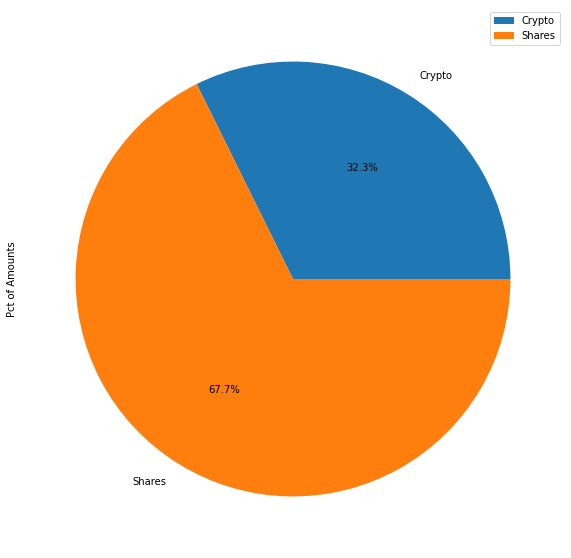

In [141]:
# Plot savings pie chart
labels = 'Crypto', 'Shares'
df_savings.plot.pie(y='Pct of Amounts',subplots=False, autopct='%1.1f%%',labels=labels, figsize=(20,10))


In [142]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings["Pct of Amounts"][0] + df_savings["Pct of Amounts"][1]

# Validate saving health


# YOUR CODE HERE!


In [143]:
if total_savings > emergency_fund:
    print(f"you have emergency money")

elif total_savings < emergency_fund:
  print(f"you have work to do")



you have emergency money


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [144]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-04-23', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-04-23', tz='America/New_York').isoformat()

In [145]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!

df_portfolio = alpaca.get_bars(
        tickers,
        timeframe,
        start=start_date,
        end=end_date             
).df

# Reorganize the DataFrame
df_portfolio.index = df_portfolio.index.date
df_portfolio
# Separate ticker data
AGG = df_portfolio [df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio [df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
df_portfolio

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY], axis=1, keys=['AGG','SPY'])

# Display sample data
df_portfolio.head(10)

AGG                                                  \
              open      high      low   close   volume trade_count   
2017-04-24  109.05  109.2200  109.000  109.18  2745689       10549   
2017-04-25  108.99  109.0450  108.770  108.82  1888469       10064   
2017-04-26  108.85  108.9700  108.770  108.96  2893801       10145   
2017-04-27  108.94  109.1000  108.910  109.06  1660940        7367   
2017-04-28  108.98  109.2500  108.910  109.25  5774846       11215   
2017-05-01  108.86  108.9599  108.620  108.73  2510027       11008   
2017-05-02  108.68  108.9400  108.679  108.88  2841518        9263   
2017-05-03  108.97  108.9900  108.770  108.77  1923403       10987   
2017-05-04  108.55  108.7000  108.550  108.68  1897912        7501   
2017-05-05  108.72  108.7400  108.570  108.70  1421843        7385   

                           SPY                                         \
                  vwap    open      high       low   close     volume   
2017-04-24  109.150827  237.17  237.4100  234.5628  237.17  119209877   
2017-04-25  108.912429  237.93  238.9500  237.8100  238.55   76698265   
2017-04-26  108.884769  238.53  239.5300  238.3500  238.40   84702455   
2017-04-27  109.026595  238.74  238.9500  237.9800  238.60   57410326   
2017-04-28  109.197005  238.93  238.9300  237.9300  238.08   63532845   
2017-05-01  108.743679  238.66  239.1700  238.1950  238.68   66882521   
2017-05-02  108.831870  238.82  238.9800  238.3000  238.77   57375732   
2017-05-03  108.902870  238.29  238.8775  237.7000  238.48   73137731   
2017-05-04  108.629678  238.81  238.9225  237.7800  238.76   61462732   
2017-05-05  108.675918  239.16  239.7200  238.6800  239.70   62001269   

                                    
           trade_count        vwap  
2017-04-24      290927  236.615988  
2017-04-25      240232  238.459191  
2017-04-26      260064  238.801347  
2017-04-27      189214  238.526193  
2017-04-28      184967  238.219327  
2017-05-01      180740  238.682276  
2017-05-02      176648  238.630973  
2017-05-03      223568  238.418100  
2017-05-04      208872  238.541805  
2017-05-05      204885  239.253410

Configure and execute a Monte Carlo Simulation of `500` runs and `30` years for the `40/60` portfolio.

In [146]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_portfolio,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [147]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()
MC_thirty_year.portfolio_data.dropna





<bound method DataFrame.dropna of                AGG                                                   \
              open      high      low   close    volume trade_count   
2017-04-24  109.05  109.2200  109.000  109.18   2745689       10549   
2017-04-25  108.99  109.0450  108.770  108.82   1888469       10064   
2017-04-26  108.85  108.9700  108.770  108.96   2893801       10145   
2017-04-27  108.94  109.1000  108.910  109.06   1660940        7367   
2017-04-28  108.98  109.2500  108.910  109.25   5774846       11215   
...            ...       ...      ...     ...       ...         ...   
2022-04-18  103.97  104.0150  103.610  103.65   8630794       35583   
2022-04-19  103.26  103.4264  102.974  103.02   7845969       32656   
2022-04-20  103.36  103.7356  103.300  103.61   8434303       32866   
2022-04-21  103.44  103.4700  102.790  103.04  11393860       35595   
2022-04-22  102.73  103.1800  102.670  102.94   9152665       31498   

                                        SP

In [148]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Jamel\Rutgers_Bootcamp\J_Boyer_Bootcamp\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007188,1.004638,1.002944,1.007697,0.993306,1.016040,0.998358,0.983522,0.997540,0.997259,...,1.007459,1.000562,1.007234,0.996434,1.002853,0.997909,1.013122,1.004365,1.014574,0.991391
2,1.001158,1.011120,1.001151,1.012180,0.991687,1.028714,0.986763,0.971748,1.004394,0.992313,...,0.998256,1.002042,1.012197,1.005290,1.013017,1.002395,1.001539,1.024076,1.026592,1.000086
3,1.003048,1.014668,1.012363,1.002006,0.983647,1.029707,0.986007,0.980483,1.004877,0.987666,...,0.996728,0.991037,1.022148,0.996511,1.010591,0.998151,1.001415,1.008046,1.021924,0.987841
4,0.995399,1.022437,1.008120,1.004882,0.970483,1.045319,0.985238,0.984370,1.010228,0.991236,...,0.995135,0.995137,1.032041,1.010693,0.998489,0.992359,1.016330,1.000810,1.027019,0.988087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.653829,6.345101,7.891489,5.000200,10.684158,20.973042,7.721861,9.637783,13.274616,0.868111,...,23.445354,10.465902,4.176103,9.309316,16.568724,9.278997,4.892215,10.028713,24.983548,10.070904
7557,7.605194,6.399976,7.947064,4.943369,10.655060,20.942354,7.774588,9.742914,13.169386,0.868128,...,23.661400,10.497796,4.115805,9.334834,16.501181,9.251352,4.876579,10.082170,24.889743,9.969780
7558,7.571092,6.425157,8.094875,4.933120,10.533948,21.102692,7.670510,9.683295,13.390156,0.887058,...,23.425823,10.576860,4.146608,9.431512,16.291702,9.247850,4.932222,10.056596,24.995265,10.013974
7559,7.508312,6.366199,8.145997,4.903330,10.524995,20.894998,7.644184,9.703663,13.316320,0.885225,...,23.377564,10.545684,4.162075,9.459527,16.186839,9.301225,4.972619,9.984045,24.728162,10.022265


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

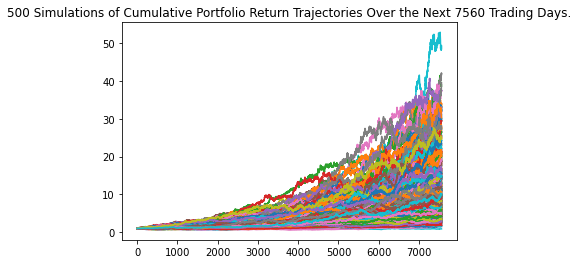

In [149]:
# Plot simulation outcomes
MC_thirty_year.plot_simulation()

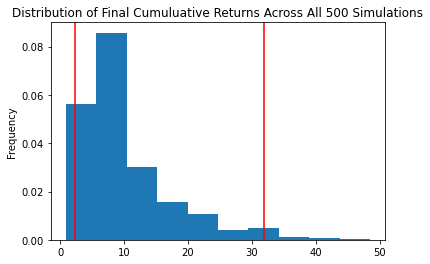

In [150]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [151]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
tbl

count           500.000000
mean             10.116171
std               7.341686
min               0.885313
25%               5.327052
50%               7.752584
75%              12.244574
max              48.461765
95% CI Lower      2.321182
95% CI Upper     31.861304
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [152]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)


In [153]:
print(f"the expected portfolio return at the `95%` lower and upper confidence intervals based on ${initial_investment} in the portfolio"

      f" ${ci_lower} and ${ci_upper}")

the expected portfolio return at the `95%` lower and upper confidence intervals based on $20000 in the portfolio $46423.64 and $637226.08


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [154]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $69635.46 and $955839.12


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [155]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [156]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [157]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [158]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [159]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [160]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")